Andrew Dodd
3/22/18

# Data Cleaning and Modeling Price
This notebook takes care of a wide variety of cleaning tasks from missingness imputation to some feature engineering.
The target variable is defined as "price + cleaning_fee/minimum_nights". 

We also model price here and make "Good Price" labels.



In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nyc_data = pd.read_csv("./Room_Data/nyc_mar2018.csv")
nyc_data_words = pd.read_csv("./Room_Data/docvecdf.csv")
nyc_data = pd.concat([nyc_data, nyc_data_words], axis=1)

nyc_data_OG = nyc_data.copy()



/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (43,61,62,88) have mixed types. Specify dtype option on import or set low_memory=False.



In [215]:
print(set(pd.unique(nyc_data['accommodates'].values.ravel())))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


In [140]:
nyc_data = nyc_data.drop(['xl_picture_url', 'license', 'medium_url', 'thumbnail_url', 'jurisdiction_names', 
                  'square_feet', 'host_acceptance_rate', 'scrape_id','monthly_price','weekly_price',
                'notes','interaction','security_deposit','access','availability_90','availability_365',
                          'summary','description','house_rules','picture_url',
                       'calculated_host_listings_count','cancellation_policy','first_review','last_review',
                         'calendar_last_scraped','experiences_offered','host_name','host_url',
                'host_location','space','last_scraped','transit','host_thumbnail_url',
                'host_picture_url','neighborhood_overview','host_id','zipcode',
                'host_total_listings_count','country_code', 'country','host_verifications',
                'neighbourhood','neighbourhood_group_cleansed','smart_location',
                'calendar_updated','street', 'extra_people'], axis = 1)
# Keep market in there, this is the city, this way our model will expand to all cities hopefully.

In [141]:
# nyc_data.isnull().sum().sort_values(ascending = False).head(50)
nyc_data.shape

(48852, 249)

In [142]:
print(list(nyc_data))
# nyc_data.head

['id', 'listing_url', 'name', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'city', 'state', 'market', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'reviews_per_month', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'

In [143]:
pd.set_option('display.max_columns', None)
display(nyc_data)

,id,listing_url,name,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,2515,https://www.airbnb.com/rooms/2515,Stay at Chez Chic budget room #1,2008-09-06,loves to host and welcome travelers from arou...,within a few hours,100%,f,Harlem,3.0,t,t,Harlem,New York,NY,New York,40.799205,-73.953676,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$59.00,$60.00,2,2,21,t,9,32,164,92.0,9.0,9.0,10.0,9.0,9.0,9.0,f,f,f,f,f,1.43,-0.047388,-0.152411,0.004522,-0.056630,0.008756,0.006360,-0.113600,0.025916,0.068898,0.037891,0.051908,0.062499,-0.147900,-0.131815,0.022826,-0.055928,0.010916,0.066813,0.114566,0.163742,0.071849,-0.174923,0.148060,0.157580,0.144919,-0.076957,0.128636,0.065942,-0.000575,0.001261,-0.095000,0.066660,-0.080308,0.070065,0.024787,0.069062,0.047867,0.242149,-0.057259,0.080215,-0.174966,0.134067,-0.058116,-0.160729,0.062633,0.155238,0.084042,0.026984,0.023368,0.070983,-0.056755,0.045566,-0.044640,-0.191142,0.052540,0.124227,0.043288,0.059828,0.048594,-0.061834,-0.001351,0.031960,-0.154425,-0.150348,-0.021493,-0.023622,-0.083081,-0.019193,-0.092921,-0.007472,-0.079385,-0.038305,0.091561,0.006574,-0.068986,-0.003594,0.088192,-0.039369,-0.011730,-0.116204,-0.117453,0.022502,0.109913,-0.018201,-0.080330,0.088603,-0.071140,-0.114885,0.072075,0.069202,-0.055092,0.156348,0.027088,-0.315945,0.225913,-0.053196,0.105867,0.059858,-0.078040,0.053214,0.011529,-0.029337,-0.081554,0.023424,-0.027930,0.026808,0.037706,0.059990,0.066680,-0.003699,0.057307,0.147354,0.031625,0.052052,-0.010146,-0.027201,-0.071534,0.030815,0.003258,0.063476,0.078824,-0.048220,-0.009676,0.072691,-0.143496,-0.134734,-0.072298,-0.002733,-0.016513,-0.110071,-0.128182,0.087644,0.058542,0.062915,0.021559,-0.120149,0.025741,0.028775,-0.052515,-0.032200,-0.156996,-0.083498,0.035099,-0.002290,0.158767,0.001360,-0.047279,-0.150758,0.124432,0.065242,-0.116224,-0.004644,-0.143069,-0.009900,0.128703,0.159823,0.019384,-0.076707,0.034223,-0.022311,-0.113442,0.050725,-0.031674,0.019564,0.066970,0.049971,-0.009947,-0.040330,-0.081309,-0.068260,0.043507,0.089162,-0.033999,0.030887,0.045529,0.075177,-0.053547,-0.035206,0.115275,-0.136228,-0.063265,-0.057558,0.007644,-0.057129,0.019162,0.096165,0.028272,0.110591,-0.056339,0.047693,-0.003038,0.002107,-0.032869,0.043584,-0.031641,0.044421,0.026070,-0.127249,0.046039,-0.130705
1,2539,https://www.airbnb.com/rooms/2539,Clean & quiet apt home by the park,2008-09-07,Educated professional living in Brooklyn. I l...,within an hour,100%,t,Gravesend,7.0,t,t,Kensington,Brooklyn,NY,New York,40.647486,-73.972370,f,Apart

In [144]:
newListMask = nyc_data['review_scores_location'].isnull()
nyc_data['newListing'] = newListMask
nyc_data['newListing'] = nyc_data['newListing'].map({True: 1, False:0}).astype(int)

In [145]:
print(set(pd.unique(nyc_data['host_has_profile_pic'].values.ravel())))

{nan, 't', 'f'}


## Mapping t and f to 0 and 1 and filling some NAs

In [146]:
nyc_data['requires_license'] = nyc_data['requires_license'].map({'t': 1, 'f':0}).astype(int)
nyc_data['instant_bookable'] = nyc_data['instant_bookable'].map({'t': 1, 'f':0}).astype(int)
nyc_data['is_business_travel_ready'] = nyc_data['is_business_travel_ready'].map({'t': 1, 'f':0}).astype(int)
nyc_data['require_guest_profile_picture'] = nyc_data['require_guest_profile_picture'].map({'t': 1, 'f':0}).astype(int)
nyc_data['require_guest_phone_verification'] = nyc_data['require_guest_phone_verification'].map({'t': 1, 'f':0}).astype(int)
nyc_data['has_availability'] = nyc_data['has_availability'].map({'t': 1, 'f':0}).astype(int)
nyc_data['is_location_exact'] = nyc_data['is_location_exact'].map({'t': 1, 'f':0}).astype(int)
nyc_data['host_has_profile_pic'] = nyc_data['host_has_profile_pic'].map({'t': 1, 'f':0, np.nan:0}).astype(int)
nyc_data['host_identity_verified'] = nyc_data['host_identity_verified'].map({'t': 1, 'f':0, np.nan:0}).astype(int)
nyc_data['host_is_superhost'] = nyc_data['host_is_superhost'].map({'t': 1, 'f':0, np.nan:0}).astype(int)

In [147]:
nyc_data['not_null_about']= nyc_data['host_about'].notnull()
nyc_data['not_null_about'] = nyc_data['not_null_about'].map({True: 1, False:0}).astype(int)

In [148]:
nyc_data = nyc_data.drop('host_about', 1)

In [149]:
nyc_data['reviewed']= nyc_data['review_scores_location'].notnull()
nyc_data['reviewed'] = nyc_data['reviewed'].map({True: 1, False:0}).astype(int)

In [150]:
nyc_data['review_scores_location'].fillna(inplace=True, value = -99999)
nyc_data['review_scores_value'].fillna(inplace=True, value = -99999)
nyc_data['review_scores_checkin'].fillna(inplace=True, value = -99999)
nyc_data['review_scores_accuracy'].fillna(inplace=True, value = -99999)
nyc_data['review_scores_communication'].fillna(inplace=True, value = -99999)
nyc_data['review_scores_cleanliness'].fillna(inplace=True, value = -99999)
nyc_data['review_scores_rating'].fillna(inplace=True, value = -99999)

In [151]:
# host_response_time                  14663
# host_response_rate                  14663
# cleaning_fee                        10899

In [152]:
nyc_data['host_response_time'] = nyc_data['host_response_time'].map({'within an hour': 0,
                                                                     'within a few hours': 1,
                                                                     'within a day': 2,
                                                                     'a few days or more': 3,
                                                                     np.nan: 1}).astype(int)

In [153]:
def no_percent(val):
    return np.nan if type(val) == float else int(val[:-1])

nyc_data['host_response_rate'] = nyc_data['host_response_rate'].map(no_percent)
nyc_data['host_response_rate'].fillna(inplace=True, value = -99999)

In [154]:
def clean_fee(val):
    return np.nan if type(val) == float else float(val[1:])

nyc_data['cleaning_fee'] = nyc_data['cleaning_fee'].map(clean_fee)
nyc_data['cleaning_fee'].fillna(0, inplace=True)

## Addressing Cleaning_Fee variable...

In [155]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.iplot({
    "data": [Scatter(x=nyc_data_subset['price'], y=nyc_data_subset['cleaning_fee'], mode = 'markers', opacity=1)],
    "layout": Layout(title="hello world")
})

In [156]:
def price_fix(val):
    if val.find(",") != -1:
        return 5000
    else:
        return np.nan if type(val) == float else float(val[1:])
nyc_data['price'] = nyc_data['price'].map(price_fix)

##  Price

In [158]:
nyc_data['price'] = pd.to_numeric(nyc_data['price'])
# Create training dataset for ML pipeline without outliers and take log of price, with cleaning fee included.
nyc_data = nyc_data[nyc_data['price']<450]

nyc_data['log_price'] = np.log(nyc_data['price']+1 + nyc_data['cleaning_fee']/nyc_data['minimum_nights'])

nyc_data_subset = nyc_data.sample(frac=0.1, replace=False)

mask = nyc_data_subset['minimum_nights']<50
nyc_data_subset = nyc_data_subset[mask]

vals = nyc_data_subset['log_price'].values
vals = nyc_data_subset['price']
max(vals)

449.0

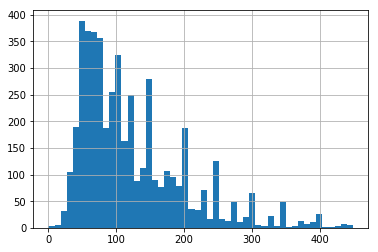

In [159]:
#!/usr/bin/env python
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
plt.hist(vals, 50)
plt.grid(True)

plt.show()

## Dealing with some categorical variables

In [160]:
# print(set(pd.unique(nyc_data['property_type'].values.ravel())))
# print(nyc_data.groupby('property_type').nunique())
def clean_property(val):
    list_common = ['Apartment','Townhouse','Loft','Condominium','House']
    return val if val in list_common else 'Rare'

nyc_data['property_type'] = nyc_data['property_type'].map(clean_property)

nyc_data['property_type'] = nyc_data['property_type'].map({'Apartment': 0,
                                                                     'Townhouse': 1,
                                                                     'Loft': 2,
                                                                     'Condominium': 3,
                                                                     'House': 4,
                                                                     'Rare': 7}).astype(int)
# nyc_data.groupby(nyc_data.property_type.str.strip("'"))['property_type'].nunique()

In [161]:
nyc_data['same_area'] = nyc_data['neighbourhood_cleansed'] == nyc_data['host_neighbourhood']

nyc_data['same_area'] = nyc_data['same_area'].map({False: 0,
                                                    True: 1,
                                                    np.nan: 1}).astype(int)

# nyc_data = nyc_data.drop('host_neighbourhood', 1)

## Category to count encoding and filling some NAs

In [162]:
# Imputing neighbourhood

# Convert these to category
#'neighbourhood_cleansed' 'room_type','bed_type'

nyc_data['neighbourhood_cleansed'] = pd.Categorical(nyc_data.neighbourhood_cleansed)
nyc_data['room_type'] = pd.Categorical(nyc_data.room_type)
nyc_data['bed_type'] = pd.Categorical(nyc_data.bed_type)

nyc_data_count = nyc_data.copy()

list_columns = ['neighbourhood_cleansed','room_type','bed_type']

# for every column
for i in range(nyc_data_count.shape[1]):
    j = 0
    if nyc_data.columns[i] in list_columns:
        counts = nyc_data_count.iloc[:,i].value_counts()
        counts = counts.sort_index()
        counts = counts.fillna(0)
        counts += np.random.rand(len(counts))/1000
        nyc_data_count.iloc[:,i].cat.categories = counts
nyc_data = nyc_data_count

nyc_data['neighbourhood_cleansed'] = pd.to_numeric(nyc_data.neighbourhood_cleansed)
nyc_data['room_type'] = pd.to_numeric(nyc_data.room_type)
nyc_data['bed_type'] = pd.to_numeric(nyc_data.bed_type)

# nyc_data.columns.to_series().groupby(nyc_data.dtypes).groups

In [163]:
nyc_data['reviews_per_month'].fillna(inplace=True, value = -99999)
nyc_data['beds'].fillna(inplace=True, value = -99999)
nyc_data['bedrooms'].fillna(inplace=True, value = -99999)
nyc_data['host_listings_count'].fillna(inplace=True, value = -99999)
nyc_data['city'].fillna(inplace=True, value = 'Unknown')
nyc_data['name'].fillna(inplace=True, value = 'Unknown')
nyc_data['state'].fillna(inplace=True, value = 'Unknown')
nyc_data['bathrooms'].fillna(inplace=True, value = -99999)
# nyc_data['market'].fillna(inplace=True, value = 'New York')

In [164]:
# nyc_data.isnull().sum().sort_values(ascending = False).head(50)

### Getting Amenities as columns

In [165]:
# AMENITIES NEXT...
# print(nyc_data['amenities'])

def get_amenities_list(x):
    x = x.lower()
    for ch in ['"', '{', '}', '.', ':','/', '’','(s)']:
        if ch in x:
            x = x.replace(ch,"")
    x = x.replace(' ', '_')
    x_list = x.split(",")
    return x_list

def get_amenities_string(x):
    x = x.lower()
    for ch in ['"', '{', '}', '.', ':','/', '’','(s)']:
        if ch in x:
            x = x.replace(ch,"")
    x = x.replace(',', ' ')
    return x
    
# get list for each of them, them make term frequency matrix
full_string = ""

amenities_col = nyc_data['amenities']
for i in range(nyc_data.shape[0]):
    x = amenities_col.iloc[i]
    small_string = get_amenities_string(x)
    full_string += " " + small_string

print(full_string[0:100])

 cable tv internet wifi air conditioning kitchen buzzerwireless intercom heating familykid friendly 


In [166]:
from collections import Counter
word_counts = Counter(full_string.split()).most_common()
print(len(word_counts))
print(word_counts[0:5])

192
[('detector', 67213), ('wifi', 46417), ('friendly', 44674), ('dryer', 44482), ('kitchen', 43839)]


In [167]:
word_list = full_string.split()
unique_words = list(set(word_list))
print(unique_words[0:5])

['events', 'floor', 'linens', 'lock', 'gym']


In [168]:
# Making amenities lists to dataset
nyc_data['amenities_list'] = nyc_data['amenities'].map(get_amenities_list)

In [169]:
# for every row, iterate through unique_words, if the word is in the list, change value of word column to 1, else 0

# Initialize columns
for unique_word in unique_words: 
    nyc_data[unique_word] = pd.Series(np.random.randn(nyc_data.shape[0]), index=nyc_data.index)

In [170]:
amenities_list_col = nyc_data['amenities_list']

def search_for_word(x, unique_word):
    return 1 if unique_word in x else 0

# Mapping amenities list to 0 or 1
for unique_word in unique_words:
    nyc_data[unique_word] = amenities_list_col.apply(search_for_word, args=(unique_word,))
    
print(nyc_data.shape)

(47438, 446)


In [171]:
print(nyc_data['oven'][0:5])

0    0
1    0
2    1
3    0
4    0
Name: oven, dtype: int64


In [172]:
print(nyc_data.shape)

(47438, 446)


## Removing outliers and setting price and saving files locally

In [173]:
# Keep original dataset
nyc_data = nyc_data.drop('amenities', 1)
nyc_data = nyc_data.drop('amenities_list', 1)
nyc_data = nyc_data.drop('host_since', 1)
nyc_data = nyc_data.drop('n', 1)
nyc_data = nyc_data.drop('you', 1)
nyc_data = nyc_data.drop('before', 1)
nyc_data = nyc_data.drop('and', 1)
nyc_data = nyc_data.drop('or', 1)
nyc_data = nyc_data.drop('with', 1)
nyc_data = nyc_data.drop('out', 1)
nyc_data = nyc_data.drop('on', 1)
nyc_data = nyc_data.drop('off', 1)
nyc_data = nyc_data.drop('to', 1)

# May want these back later.....
# nyc_data = nyc_data.drop('city', 1)
# nyc_data = nyc_data.drop('state', 1)
nyc_data = nyc_data.drop('market', 1)

nyc_data_orig = nyc_data.copy()

In [177]:
nyc_data.isnull().sum().sum() # No nulls...

6619

In [178]:
from fastparquet import write 
# nyc_data.to_json(filepath = './Room_Data/nyc_data.json', orient=“records”)
# nyc_data_orig.to_json(filepath = './Room_Data/nyc_data_orig.json', orient=“records”)

write('./Room_Data/nyc_data.parquet', nyc_data)
write('./Room_Data/nyc_data_orig.parquet', nyc_data_orig)

In [179]:
nyc_data

,id,listing_url,name,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,newListing,not_null_about,reviewed,log_price,same_area,events,floor,linens,lock,gym,smart,flat,living,other,checkout,books,charger,accessible-height,grill,card,lockbox,clearance,air,grab,roll-in,wheelchair,dishes,extinguisher,friendly,premises,parking,suitable,ski,free,ground,path,pet,shades,long,bedroom,check-in,lake,room,dinnerware,spot,allowed,dog,outlet,baby,covers,kettle,blankets,property,door,gates,table,guards,game,bathtub,balcony,pets,console,ethernet,doorway,bath,carbon,term,ev,well-lit,live,keypad,self,room-darkening,bathroom,disabled,monoxide,shampoo,pool,dryer,garden,fireplace,entryway,toilet,cooking,heating,smoke,deskdoorperson,kit,detector,childrens,doorman,shower,safety,familykid,playtravel,firm,head,toys,dropoff,single,home,tv,first,maker,crib,smoking,stays,internet,street,step-free,elevator,window,connection,refrigerator,pack,entrance,backyard,stair,wide,dishwasher,cable,wifi,extra,oven,workspace,accessible,beach,this,bed,hair,purifier,beachfront,paid,hallway,kitchen,fire,patio,cat,coffee,access,greets,cleaning,for,laptop,24-hour,aid,private,babysitter,intercom,high,indoor,silverware,level,iron,hot,fixed,pillows,translation,washer,buzzerwireless,front,basics,waterfront,changing,inski,luggage,handheld,chair,mattress,pocket,hangers,conditioning,water,bbq,enhosting_amenity_49,tub,monitor,enhosting_amenity_50,stove,breakfast,corner,recommendations,missing,microwave,host,bars,essentials
0,2515,https://www.airbnb.com/rooms/2515,Stay at Chez Chic budget room #1,1,100.0,0,Harlem,3.0,1,1,2840.000950,New York,NY,40.799205,-73.953676,1,0,23377.000934,2,1.0,1.0,2.0,46224.000989,59.0,60.0,2,2,21,1,9,32,164,92.0,9.0,9.0,10.0,9.0,9.0,9.0,0,0,0,0,0,1.43,-0.047388,-0.152411,0.004522,-0.056630,0.008756,0.006360,-0.113600,0.025916,0.068898,0.037891,0.051908,0.062499,-0.147900,-0.131815,0.022826,-0.055928,0.010916,0.066813,0.114566,0.163742,0.071849,-0.174923,0.148060,0.157580,0.144919,-0.076957,0.128636,0.065942,-0.000575,0.001261,-0.095000,0.066660,-0.080308,0.070065,0.024787,0.069062,0.047867,0.242149,-0.057259,0.080215,-0.174966,0.134067,-0.058116,-0.160729,0.062633,0.155238,0.084042,0.026984,0.023368,0.070983,-0.056755,0.045566,-0.044640,-0.191142,0.052540,0.124227,0.043288,0.059828,0.048594,-0.061834,-0.001351,0.031960,-0.154425,-0.150348,-0.021493,-0.023622,-0.083081,-0.019193,-0.092921,-0.007472,-0.079385,-0.038305,0.091561,0.006574,-0.068986,-0.003594,0.088192,-0.039369,-0.011730,-0.116204,-0.117453,0.022502,0.109913,-0.018201,-0.080330,0.088603,-0.071140,-0.114885,0.072075,0.069202,-0.055092,0.156348,0.027088,-0.315945,0.

In [180]:
nyc_data.columns.to_series().groupby(nyc_data.dtypes).groups
list(nyc_data)

['id',
 'listing_url',
 'name',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'city',
 'state',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'price',
 'cleaning_fee',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'instant_bookable',
 'is_business_travel_ready',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'reviews_per_month',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13

## Local Modeling

In [182]:
from sklearn.model_selection import train_test_split

nyc_sample = nyc_data.sample(20000)

nyc_sample = nyc_sample.drop('name', 1)
nyc_sample = nyc_sample.drop('listing_url', 1)
nyc_sample = nyc_sample.drop('host_neighbourhood', 1)
# nyc_sample = nyc_sample.drop('id', 1)
nyc_sample = nyc_sample.drop('city', 1)
nyc_sample = nyc_sample.drop('state', 1)
nyc_sample = nyc_sample.drop('price', 1)
nyc_sample = nyc_sample.drop('cleaning_fee', 1)

y = nyc_sample['log_price'].values
nyc_sample = nyc_sample.drop('log_price', 1)
X = nyc_sample.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [183]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=25, random_state=0)
regr.fit(X_train, y_train)
print(regr.feature_importances_)

from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = regr.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print(rmse)
print(list(nyc_sample))

[6.13507679e-03 2.80171700e-04 2.48220659e-03 1.68902348e-04
 1.26248019e-03 3.26939985e-07 2.75644723e-04 4.17987564e-03
 5.12527937e-02 8.40997456e-02 9.62052543e-05 1.96202852e-03
 4.35769550e-01 4.11688380e-02 7.52699639e-03 1.66003309e-02
 1.11426216e-03 3.44772074e-04 3.37992313e-03 1.21607574e-02
 1.51696735e-03 0.00000000e+00 6.35920383e-03 1.32684414e-02
 1.07217899e-03 1.16570348e-03 1.52122746e-04 8.04544656e-04
 2.44435000e-04 1.80310930e-04 2.27480322e-04 2.17674288e-04
 0.00000000e+00 7.38582928e-05 5.78381118e-06 1.40438752e-05
 3.24198842e-07 2.90791634e-03 2.15317338e-03 1.38968307e-03
 1.60292182e-03 1.10080554e-03 1.42063178e-03 1.57584641e-03
 2.57680630e-03 1.85964867e-03 1.02764628e-03 1.43918550e-03
 1.66393368e-03 1.24039660e-03 1.46157449e-03 1.40497694e-03
 1.35150360e-03 1.62066582e-03 1.36233974e-03 1.36432689e-03
 1.37094943e-03 1.38371106e-03 1.39269234e-03 1.21021656e-03
 1.17223571e-03 9.01943794e-04 9.40215457e-04 2.21013534e-03
 1.97816253e-03 1.307453

In [184]:
print(np.exp(y_predicted[1:10]))
print(np.exp(y_test[1:10]))

[240.06389674  71.79224212 242.43504721 120.67118251 184.35696816
  89.15571085 144.70790115 205.52170582  82.01126042]
[160.          41.         201.         111.         267.66666667
  49.85714286 149.         175.         351.        ]


## We have a lot of features that aren't doing anything, so we will remove them.

In [185]:
list_bad_features = []
print(len(regr.feature_importances_))
for i in range(len(regr.feature_importances_)):
    if regr.feature_importances_[i] == 0:
        print(i)
        feat = list(nyc_sample)[i]
        print(feat)
        list_bad_features.append(feat)
print(list_bad_features)

424
21
has_availability
32
requires_license
242
events
243
floor
244
linens
245
lock
247
smart
248
flat
249
living
251
checkout
252
books
253
charger
254
accessible-height
255
grill
256
card
258
clearance
259
air
260
grab
261
roll-in
262
wheelchair
263
dishes
264
extinguisher
265
friendly
266
premises
267
parking
268
suitable
269
ski
270
free
271
ground
272
path
273
pet
274
shades
275
long
276
bedroom
277
check-in
278
lake
279
room
280
dinnerware
281
spot
282
allowed
284
outlet
285
baby
286
covers
287
kettle
288
blankets
289
property
290
door
291
gates
292
table
293
guards
294
game
296
balcony
297
pets
298
console
299
ethernet
300
doorway
301
bath
302
carbon
303
term
304
ev
305
well-lit
306
live
308
self
309
room-darkening
310
bathroom
311
disabled
312
monoxide
316
garden
317
fireplace
318
entryway
319
toilet
320
cooking
322
smoke
323
deskdoorperson
324
kit
325
detector
326
childrens
328
shower
329
safety
330
familykid
331
playtravel
332
firm
333
head
334
toys
335
dropoff
336
single
33

In [207]:
nyc_sample = nyc_data.sample(20000)

for feature in list_bad_features: 
    nyc_sample = nyc_sample.drop(feature, 1)

nyc_sample = nyc_sample.drop('name', 1)
nyc_sample = nyc_sample.drop('listing_url', 1)
nyc_sample = nyc_sample.drop('host_neighbourhood', 1)
# nyc_sample = nyc_sample.drop('id', 1)
nyc_sample = nyc_sample.drop('city', 1)
nyc_sample = nyc_sample.drop('state', 1)
nyc_sample = nyc_sample.drop('price', 1)
nyc_sample = nyc_sample.drop('cleaning_fee', 1)

nyc_sample = nyc_sample.drop('price_good', 1)

print(nyc_sample.shape)

y = nyc_sample['log_price'].values
nyc_sample = nyc_sample.drop('log_price', 1)
X = nyc_sample.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_features = 50, random_state=0, n_estimators = 50)
regr.fit(X_train, y_train)
# print(regr.feature_importances_)

from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = regr.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print(rmse)
# print(list(nyc_sample))

(20000, 270)
0.35858358430584886


In [188]:
print(np.exp(y_predicted[1:20]))
print(np.exp(y_test[1:20]))
print((X_test[1:10,0]))

[199.38495682 223.92882204 188.62460147 128.04835227 109.2385218
 146.17860462  90.3072204  103.34583775 173.46782662  58.7813209
  54.4253546  151.16577553 107.67010889 147.54617315  41.56678644
 104.19833869 102.96891701 127.38093327 283.69111767]
[137.66666667  97.66666667  81.         176.          96.
 101.          71.         126.         127.         111.
  64.33333333 156.         169.75       101.          74.33333333
  91.          95.         131.         389.33333333]
[21754508. 19805940. 12003146. 16961053.  1950603. 16718774. 22675757.
 21458632. 21899473.]


In [189]:
errors = y_predicted-y_test
std = np.std(errors)

print(std)

0.36655095703312346


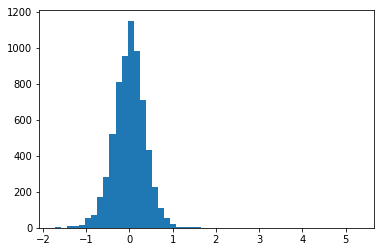

In [190]:
import matplotlib.pyplot as plt
plt.hist(errors, bins=50)
plt.show()

## Good deal?
Here we look at making good deals which are the listings with actual prices significantly below the predicted price (best 5% of prices based on normal distribution).

In [191]:
price_good = []
for i in range(len(y_test)):
    actual = y_test[i]
    predicted = y_predicted[i]
    difference = actual - predicted
    if difference > .61:
        print("="*50)
        print(difference)
        print(np.exp(actual), "actual")
        print(np.exp(predicted), "predicted")
        print("bad deal")
        print(int(X_test[i,0]))
        price_good.append('Bad Deal')
    if difference < -.61:
        print("="*50)
        print(difference)
        print(np.exp(actual), "actual")
        print(np.exp(predicted), "predicted")
        print("good deal")
        print(int(X_test[i,0]))
        price_good.append('Good Deal')
    else:
        price_good.append('Reasonable Deal')


-0.8297679222667353
97.66666666666667 actual
223.92882204149183 predicted
good deal
19805940
-0.8453096495908641
81.00000000000003 actual
188.62460146886013 predicted
good deal
12003146
0.6357060686559697
110.99999999999997 actual
58.7813208993449 predicted
bad deal
17256433
-1.6024648677864959
21.0 actual
104.27037711486861 predicted
good deal
21394627
-0.8169619745055128
95.99999999999999 actual
217.30679697019235 predicted
good deal
3791764
-0.8213241176851458
74.00000000000003 actual
168.23960959867017 predicted
good deal
9436038
0.6365480230532405
112.66666666666664 actual
59.613710154219426 predicted
bad deal
5936796
0.8503672791590482
254.99999999999991 actual
108.95078494495078 predicted
bad deal
7455604
-1.0560733442161419
30.000000000000004 actual
86.2517828030641 predicted
good deal
13893774
0.8156521396371215
146.0 actual
64.58321078695359 predicted
bad deal
21610552
-0.9637808685854434
72.99999999999999 actual
191.3760440981501 predicted
good deal
5986444
-0.62197897800438

177.82402008573658 predicted
bad deal
6851033
-0.6100986843234635
86.33333333333334 actual
158.9062582109973 predicted
good deal
19325952
0.9371786088552883
201.0 actual
78.73803260238766 predicted
bad deal
719621
0.6771155438285543
401.00000000000006 actual
203.74024699743086 predicted
bad deal
13708345
-0.716969827820324
61.00000000000001 actual
124.94125814316544 predicted
good deal
22919133
0.8609922461769424
500.9999999999999 actual
211.793947211152 predicted
bad deal
22601779
0.8075215257458321
341.00000000000006 actual
152.07304300974099 predicted
bad deal
5523876
-0.6503563024430905
57.66666666666667 actual
110.50221967059576 predicted
good deal
15943090
-0.7891131921888723
98.49999999999999 actual
216.84216536958252 predicted
good deal
6611547
0.7321119939068179
230.99999999999994 actual
111.08611558625464 predicted
bad deal
14354698
-0.7167127269527684
101.00000000000003 actual
206.8167723999585 predicted
good deal
10209278
-0.9310211314955303
36.0 actual
91.33554839735343 pr

117.13077261911282 predicted
good deal
23374376
0.6833782616579738
331.0 actual
167.1246788356917 predicted
bad deal
17731891
1.1411407587569347
227.00000000000006 actual
72.51614732054043 predicted
bad deal
5857519
0.6838076865855003
321.0 actual
162.00601052406375 predicted
bad deal
11455372
-0.8489448652246745
31.0 actual
72.4525648437284 predicted
good deal
11271036
-0.6273023201844063
66.99999999999997 actual
125.46099827749558 predicted
good deal
22433949
0.7026910011970706
158.49999999999994 actual
78.49724998372476 predicted
bad deal
3297290
1.5905943955667694
175.00000000000009 actual
35.66577617252856 predicted
bad deal
20386575
-0.6409730853173006
86.75 actual
164.67988591674515 predicted
good deal
15361785
0.7767520365515774
110.00000000000004 actual
50.58870495997852 predicted
bad deal
21801959
0.8922637837457508
300.9999999999999 actual
123.32787768473442 predicted
bad deal
6292334
0.8500058374593076
249.5 actual
106.6394030162147 predicted
bad deal
15147021
0.89598297775

11841709
0.6310218480789258
147.50000000000006 actual
78.47705803173662 predicted
bad deal
19713735
0.724673794576078
334.3333333333333 actual
161.97867726002136 predicted
bad deal
17829738
-0.646798407905425
51.0 actual
97.38031063054201 predicted
good deal
22479926
-0.7533776305455646
61.00000000000001 actual
129.57391554511852 predicted
good deal
6103146
0.7830589411934454
159.99999999999994 actual
73.12094668305315 predicted
bad deal
22174923
0.9306053077740533
151.0 actual
59.54155838780006 predicted
bad deal
11148320
0.8669218377947168
211.99999999999997 actual
89.09154502507215 predicted
bad deal
22590225
0.6463087695983978
125.16666666666669 actual
65.58437049658563 predicted
bad deal
11462440
-0.7569505495195945
33.14285714285715 actual
70.65280224652626 predicted
good deal
16097690
0.9654997652196746
175.99999999999991 actual
67.01954074764762 predicted
bad deal
8275069
1.2443846524920126
151.0 actual
43.50584010292701 predicted
bad deal
8665778
-0.6128258173243513
171.000000

In [195]:
nyc_sample = nyc_data.copy()
print(nyc_sample.shape)

for feature in list_bad_features: 
    nyc_sample = nyc_sample.drop(feature, 1)

nyc_sample = nyc_sample.drop('name', 1)
nyc_sample = nyc_sample.drop('listing_url', 1)
nyc_sample = nyc_sample.drop('host_neighbourhood', 1)
# nyc_sample = nyc_sample.drop('id', 1)
nyc_sample = nyc_sample.drop('city', 1)
nyc_sample = nyc_sample.drop('state', 1)
nyc_sample = nyc_sample.drop('price', 1)
nyc_sample = nyc_sample.drop('cleaning_fee', 1)

y = nyc_sample['log_price'].values
nyc_sample = nyc_sample.drop('log_price', 1)
X = nyc_sample.values

y_predicted = regr.predict(X)
rmse = sqrt(mean_squared_error(y, y_predicted))
print(rmse)
print(list(nyc_sample))

(47438, 432)
0.32386254530351977
['id', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'reviews_per_month', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',

In [196]:
price_good = []
for i in range(len(y)):
    actual = y[i]
    predicted = y_predicted[i]
    difference = actual - predicted
    if difference < -.61:
        price_good.append('Good Deal')
    else:
        price_good.append('Reasonable Deal')
        
print(len(price_good))
nyc_data['price_good'] = price_good

47438


## Building output dataframe of room id, price_good

In [197]:
list_filler = ['Reasonable Deal'] * 48852

In [198]:
price_good_df = pd.DataFrame(
    {'id': nyc_data['id'],
     'price_good': price_good
    })
price_good_df.shape
price_good_df.head(3)

final_df = pd.merge(price_good_df,nyc_data_OG[['id','listing_url']],on='id', how='right')

# def fix_deal(val):
#     return "Reasonable Deal" if type(val) == float else int(val[:-1])

# nyc_data['host_response_rate'] = nyc_data['host_response_rate'].map(no_percent)

In [208]:
# left merge on id, url. Then add "Reasonable Deal" to the price_good with NAs.
print(final_df.shape)
final_df[20050:20100]
final_df.isnull().sum().sort_values(ascending = False).head(50)

(48852, 3)


price_good     1414
listing_url       0
id                0
dtype: int64

In [200]:
final_df.to_csv("./Room_Data/room_deals.csv")